![imagen](http://2.bp.blogspot.com/_0-_vRDdtSQo/TD53_VXIfkI/AAAAAAAAAMc/hVOHAFunV5s/s400/manzana+2.JPG)  

|realizado|Fecha|email|Cometario|
|---------|-----|-----|---------|
|Luis Hernández|7 de mayo 2020|luishernandez@yahoo.com|predice cuando debemos comprar y vender acciones|

# Predcir Compra y Venta de acciones Apple

## Librerias
---

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')
from datetime import datetime

## Cargar Datos
---

In [30]:
aapl = pd.read_csv('AAPL.csv')
aapl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600


In [6]:
aapl.shape

(184, 7)

## Visualizar cirre de acciones
---

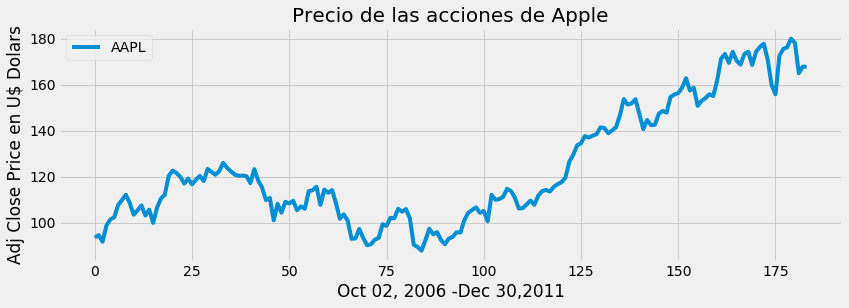

In [10]:
plt.figure(figsize = (12.5,4))
plt.title("Precio de las acciones de Apple", size = 20)
plt.plot(aapl['Adj Close'], label = 'AAPL')
plt.xlabel('Oct 02, 2006 -Dec 30,2011')
plt.ylabel('Adj Close Price en U$ Dolars')
plt.legend(loc = 'upper left')
plt.show()

## Crear Movimiento:
- 30 days
- 100 days

In [41]:
sma30 = pd.DataFrame()
sma30['close_price'] = aapl['Adj Close'].rolling(window = 30).mean()
sma30.head()

,close_price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


In [44]:
sma100 = pd.DataFrame()
sma100['close_price'] = aapl['Adj Close'].rolling(window=100).mean()
sma100.head()

,close_price
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN


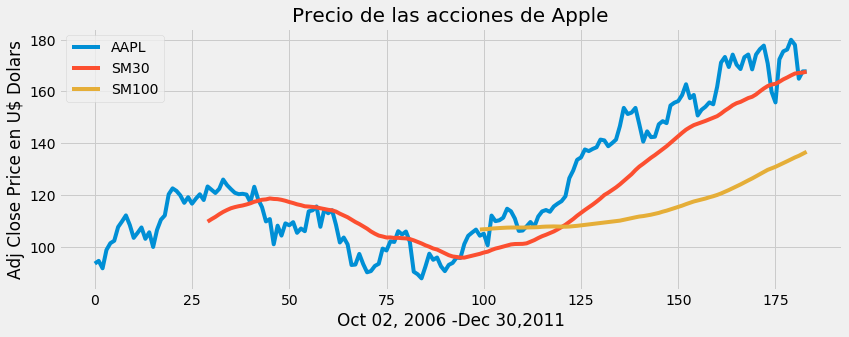

In [47]:
plt.figure(figsize = (12.5,4.5))
plt.title("Precio de las acciones de Apple", size = 20)
plt.plot(aapl['Adj Close'], label = 'AAPL')
plt.plot(sma30.close_price, label = 'SM30')
plt.plot(sma100.close_price, label = 'SM100')
plt.xlabel('Oct 02, 2006 -Dec 30,2011')
plt.ylabel('Adj Close Price en U$ Dolars')
plt.legend(loc = 'upper left')
plt.show()

In [48]:
#Crear un DataFrame con todos los datos
data = pd.DataFrame()
data['APPL'] = aapl['Adj Close']
data['SM30'] = sma30['close_price']
data['SM100'] = sma100.close_price
data.head()

,APPL,SM30,SM100
0,93.514290,NaN,NaN
1,94.556244,NaN,NaN
2,91.683792,NaN,NaN
3,98.771042,NaN,NaN
4,101.380676,NaN,NaN


In [92]:
#Crear una funcion para marcar qu dias comprar y vender
def buy_sell(data):
    SigPriceBuy = []
    SigPriceSell = []
    flag = -1

    for i in range(len(data)):
        if data.SM30[i] > data.SM100[i]:
            if flag !=1:
                SigPriceBuy.append(data.APPL[i])
                SigPriceSell.append(np.nan)
                flag =1
            else:
                SigPriceBuy.append(np.nan)
                SigPriceSell.append(np.nan)
        elif data.SM30[i] < data.SM100[i]:
            if flag !=0:
                SigPriceBuy.append(np.nan)
                SigPriceSell.append(data.SM100[i])
                flag = 0
            else:
                SigPriceBuy.append(np.nan)
                SigPriceSell.append(np.nan)
        else:
            SigPriceBuy.append(np.nan)
            SigPriceSell.append(np.nan)
        
    return (SigPriceBuy, SigPriceSell)

In [93]:
#CRear Variables
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

### Visualización de Marcas ventas compras
---

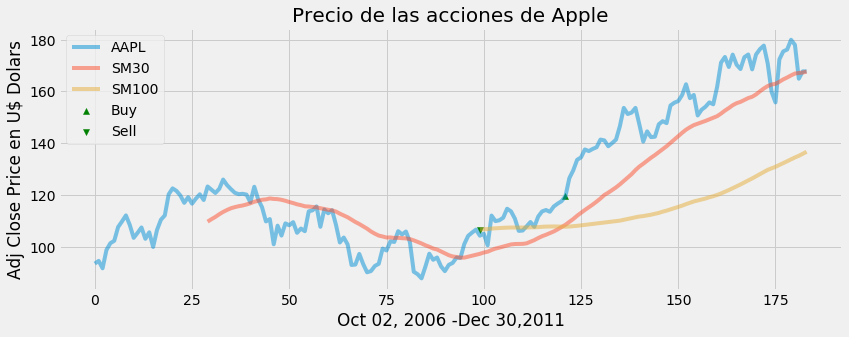

In [95]:
plt.figure(figsize = (12.5,4.5))
plt.title("Precio de las acciones de Apple", size = 20)
plt.plot(aapl['Adj Close'], label = 'AAPL', alpha = 0.5)
plt.plot(sma30.close_price, label = 'SM30', alpha = 0.5)
plt.plot(sma100.close_price, label = 'SM100', alpha = 0.5)
plt.scatter(data.index, data.Buy_Signal_Price,
           label= 'Buy', marker='^',
           color = 'green')
plt.scatter(data.index, data.Sell_Signal_Price,
           label= 'Sell', marker='v',
           color = 'green')
plt.xlabel('Oct 02, 2006 -Dec 30,2011')
plt.ylabel('Adj Close Price en U$ Dolars')
plt.legend(loc = 'upper left')
plt.show()